https://github.com/unit8co/darts/blob/master/examples/07-NBEATS-examples.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset

In [2]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

Text(0.5, 1.0, 'Hourly generation hydro run-of-river and poundage')

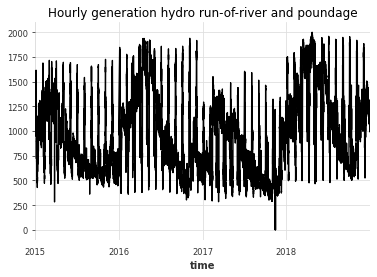

In [3]:
df = EnergyDataset().load().pd_dataframe()
df["generation hydro run-of-river and poundage"].plot()
plt.title("Hourly generation hydro run-of-river and poundage")

Text(0.5, 1.0, 'Daily generation hydro run-of-river and poundage')

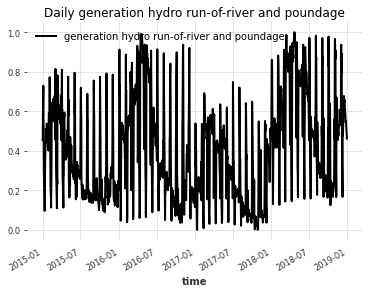

In [4]:
df_day_avg = df.groupby(df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_day_avg, "time", ["generation hydro run-of-river and poundage"]
        )
    )
).astype(np.float32)
series.plot()
plt.title("Daily generation hydro run-of-river and poundage")

In [5]:
train, val = series.split_after(pd.Timestamp("20170901"))

Generic architecture
N-BEATS is a univariate model architecture that offers two configurations: a generic one and a interpretable one. The generic architecture uses as little prior knowledge as possible, with no feature engineering, no scaling and no internal architectural components that may be considered time-series-specific.

To start off, we use a model with the generic architecture of N-BEATS:

In [6]:
model_nbeats_generic = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

## Fit

In [7]:
model_nbeats_generic.fit(train, val_series=val, verbose=True)

[2022-02-21 20:08:25,853] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2022-02-21 20:08:25,853] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2022-02-21 20:08:25,899] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-02-21 20:08:25,899] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-02-21 20:08:25,900] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-02-21 20:08:25,900] WARNING | darts.models.forecasting.torch_forecasting_model | Depreca

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

## Predict

  0%|          | 0/97 [00:00<?, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

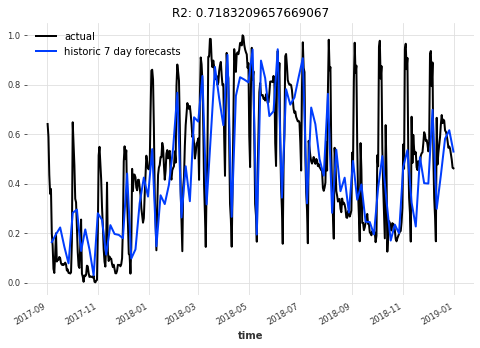

In [8]:
pred_series = model_nbeats_generic.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("20170901"))

# Interpretable Model
N-BEATS offers an interpretable architecture consisting of two stacks: A trend stack and a seasonality stack. The architecture is designed so that:

- The trend component is removed from the input before it is fed into the seasonality stack
- The partial forecasts of trend and seasonality are available as separate interpretable outputs

In [9]:
model_nbeats_interp = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=False,
    num_blocks=3,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_interpretable_run",
)

In [10]:
model_nbeats_interp.fit(series=train, val_series=val, verbose=True)

[2022-02-21 20:10:47,653] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2022-02-21 20:10:47,653] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2022-02-21 20:10:47,667] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-02-21 20:10:47,667] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-02-21 20:10:47,667] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-02-21 20:10:47,667] WARNING | darts.models.forecasting.torch_forecasting_model | Depreca

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

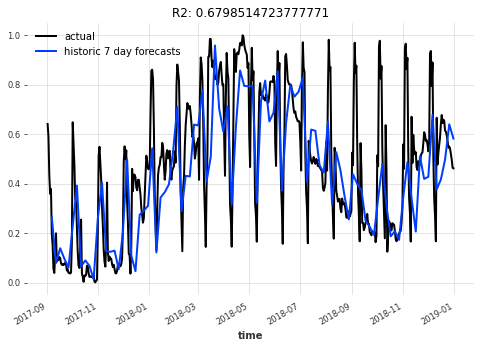

In [11]:
pred_series = model_nbeats_interp.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("20170901"))